In [146]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import datetime
# Read in data and display first 5 rows

features = pd.read_csv('genderovertime.csv')
print(data)
print('The shape of our features is:', features.shape)
features.describe()

    year  month  Total  Men, 20 years and over  Women, 20 years and over  \
0   2018      5    3.8                     3.6                       3.4   
1   2018      6    4.0                     3.7                       3.6   
2   2018      7    3.8                     3.4                       3.6   
3   2018      8    3.8                     3.5                       3.5   
4   2018      9    3.7                     3.4                       3.3   
5   2018     10    3.8                     3.5                       3.4   
6   2018     11    3.7                     3.3                       3.4   
7   2018     12    3.9                     3.6                       3.5   
8   2019      1    4.0                     3.7                       3.6   
9   2019      2    3.8                     3.5                       3.4   
10  2019      3    3.8                     3.6                       3.3   
11  2019      4    3.6                     3.4                       3.1   
12  2019    

,year,month,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2018.923077,6.423077,4.811538,4.369231,4.534615,14.434615,4.361538,7.338462,4.200000,5.911538
std,0.744208,3.396152,3.077444,2.699447,3.376500,5.306068,2.962307,3.334076,3.797368,4.151561
min,2018.000000,1.000000,3.500000,3.100000,3.100000,11.000000,3.100000,5.400000,2.100000,3.900000
25%,2018.000000,4.000000,3.600000,3.300000,3.225000,12.500000,3.225000,5.900000,2.525000,4.225000
50%,2019.000000,6.000000,3.750000,3.400000,3.350000,12.700000,3.300000,6.250000,3.000000,4.400000
75%,2019.000000,9.000000,3.875000,3.600000,3.575000,12.900000,3.475000,6.600000,3.175000,4.700000
max,2020.000000,12.000000,14.700000,13.000000,15.500000,31.900000,14.200000,16.800000,15.000000,18.900000


In [147]:
labels = np.array(features['White'])

In [148]:
features= features.drop('White', axis = 1)

In [149]:
feature_list = list(features.columns)

In [150]:
features = np.array(features)

In [151]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [152]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (19, 9)
Training Labels Shape: (19,)
Testing Features Shape: (7, 9)
Testing Labels Shape: (7,)


In [153]:
rf = RandomForestRegressor(n_estimators = 20000, random_state = 42)
rf.fit(train_features, train_labels);

In [154]:
print(test_features)

predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

[[2.019e+03 1.000e+00 4.000e+00 3.700e+00 3.600e+00 1.290e+01 6.800e+00
  3.100e+00 4.800e+00]
 [2.019e+03 9.000e+00 3.500e+00 3.200e+00 3.100e+00 1.250e+01 5.500e+00
  2.500e+00 3.900e+00]
 [2.018e+03 5.000e+00 3.800e+00 3.600e+00 3.400e+00 1.280e+01 5.900e+00
  2.200e+00 4.900e+00]
 [2.020e+03 5.000e+00 1.330e+01 1.160e+01 1.390e+01 2.990e+01 1.680e+01
  1.500e+01 1.760e+01]
 [2.019e+03 4.000e+00 3.600e+00 3.400e+00 3.100e+00 1.290e+01 6.600e+00
  2.200e+00 4.200e+00]
 [2.019e+03 2.000e+00 3.800e+00 3.500e+00 3.400e+00 1.330e+01 6.900e+00
  3.100e+00 4.300e+00]
 [2.019e+03 6.000e+00 3.700e+00 3.300e+00 3.300e+00 1.270e+01 6.000e+00
  2.100e+00 4.300e+00]]
Mean Absolute Error: 0.11 degrees.
Accuracy: 98.0 %.


In [159]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: 16 to 19 years old   Importance: 0.19
Variable: Women, 20 years and over Importance: 0.16
Variable: Total                Importance: 0.13
Variable: Men, 20 years and over Importance: 0.13
Variable: Asian                Importance: 0.13
Variable: Hispanic or Latino   Importance: 0.13
Variable: Black or African American Importance: 0.11
Variable: month                Importance: 0.02
Variable: year                 Importance: 0.0


        date  prediction
0 2019-01-01    3.485970
1 2019-09-01    3.207225
2 2018-05-01    3.362630
3 2020-05-01   11.966490
4 2019-04-01    3.190315
5 2019-02-01    3.391230
6 2019-06-01    3.309275


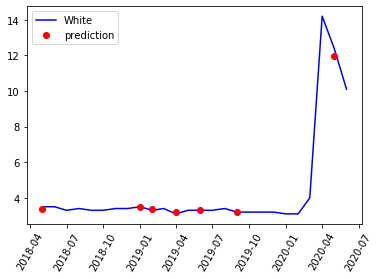

In [158]:
# Dates of training values
months = features[:, feature_list.index('month')]

years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) for year, month in zip(years, months)]
dates = [datetime.datetime.strptime(date, '%Y-%m') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'White': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]

years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) for year, month in zip(years, months)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['White'], 'b-', label = 'White')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()


# Graph labels
print(predictions_data)